# Trying to do vector interpolation
stough


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
import matplotlib.colors as mcolors

from scipy import interpolate

In [2]:
# Make a function that given an array of data Nxd, returns the associated 
# list of colors for plotting, based on the order of the data, N x 3
def get_colors(data):
    first = np.array([1,0,0])
    last = np.array([0,1,0])
    colmap = lambda alpha: (1-alpha)*first + alpha*last
    return np.vstack([colmap(x) for x in np.linspace(0,1,len(data))])

In [3]:
get_colors(np.arange(10)), get_colors(np.arange(10)).shape

(array([[1.        , 0.        , 0.        ],
        [0.88888889, 0.11111111, 0.        ],
        [0.77777778, 0.22222222, 0.        ],
        [0.66666667, 0.33333333, 0.        ],
        [0.55555556, 0.44444444, 0.        ],
        [0.44444444, 0.55555556, 0.        ],
        [0.33333333, 0.66666667, 0.        ],
        [0.22222222, 0.77777778, 0.        ],
        [0.11111111, 0.88888889, 0.        ],
        [0.        , 1.        , 0.        ]]),
 (10, 3))

In [4]:
v0 = np.array([1,0])
v1 = np.array([-1,-1])

vs = np.array([v0,v1])
vs

array([[ 1,  0],
       [-1, -1]])

In [5]:
vs[:,0]

array([ 1, -1])

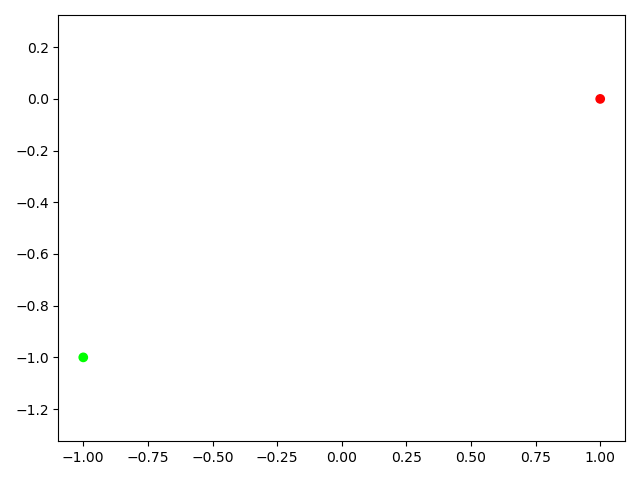

In [6]:
plt.figure()
plt.scatter(vs[:,0], vs[:,1], c=get_colors(vs))
plt.axis('equal')
plt.tight_layout()

In [7]:
lin2d = lambda alpha: (1-alpha)*v0 + alpha*v1

In [8]:
lin2d(.5)

array([ 0. , -0.5])

In [9]:
points = np.vstack([lin2d(x) for x in np.arange(0,1,.01)])

In [10]:
points.shape

(100, 2)

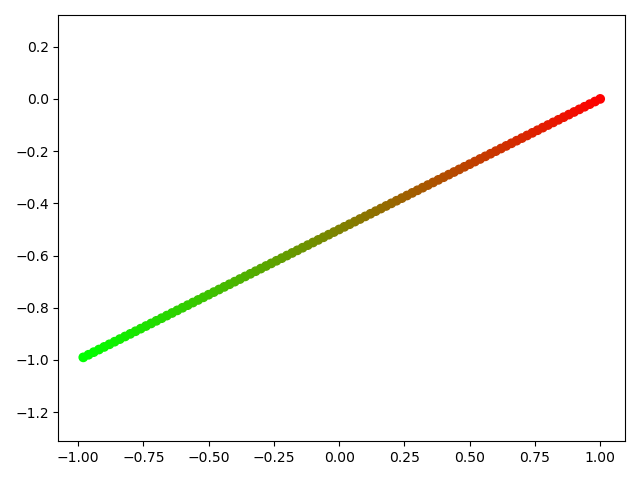

In [11]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=get_colors(points))
plt.axis('equal')
plt.tight_layout()

In [12]:
# Thank you: https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates

import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    # return(rho, phi)
    return np.vstack([rho, phi]).T

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    # return(x, y)
    return np.vstack([x, y]).T

In [13]:
cart2pol(vs[:,0], vs[:, 1])

array([[ 1.        ,  0.        ],
       [ 1.41421356, -2.35619449]])

In [14]:
180*1.57/np.pi

89.95437383553926

In [15]:
vs.shape

(2, 2)

In [16]:
polvs = cart2pol(vs[:,0], vs[:, 1])

In [17]:
polvs.shape

(2, 2)

In [18]:
polvs[0]

array([1., 0.])

In [19]:
pol2cart(polvs[:,0], polvs[:,1])

array([[ 1.,  0.],
       [-1., -1.]])

In [20]:
np.arange(0,1,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [21]:
polinterp = lambda alpha: (1-alpha)*polvs[0] + alpha*polvs[1]

In [22]:
(1-0.5)*polvs[0]

array([0.5, 0. ])

In [23]:
0.5*polvs[1]

array([ 0.70710678, -1.17809725])

In [24]:
polvs[0]

array([1., 0.])

In [25]:
polvs[1]

array([ 1.41421356, -2.35619449])

In [26]:
polpoints = np.vstack([polinterp(x) for x in np.arange(0,1,.01)])

In [27]:
polpoints

array([[ 1.        ,  0.        ],
       [ 1.00414214, -0.02356194],
       [ 1.00828427, -0.04712389],
       [ 1.01242641, -0.07068583],
       [ 1.01656854, -0.09424778],
       [ 1.02071068, -0.11780972],
       [ 1.02485281, -0.14137167],
       [ 1.02899495, -0.16493361],
       [ 1.03313708, -0.18849556],
       [ 1.03727922, -0.2120575 ],
       [ 1.04142136, -0.23561945],
       [ 1.04556349, -0.25918139],
       [ 1.04970563, -0.28274334],
       [ 1.05384776, -0.30630528],
       [ 1.0579899 , -0.32986723],
       [ 1.06213203, -0.35342917],
       [ 1.06627417, -0.37699112],
       [ 1.07041631, -0.40055306],
       [ 1.07455844, -0.42411501],
       [ 1.07870058, -0.44767695],
       [ 1.08284271, -0.4712389 ],
       [ 1.08698485, -0.49480084],
       [ 1.09112698, -0.51836279],
       [ 1.09526912, -0.54192473],
       [ 1.09941125, -0.56548668],
       [ 1.10355339, -0.58904862],
       [ 1.10769553, -0.61261057],
       [ 1.11183766, -0.63617251],
       [ 1.1159798 ,

In [28]:
points2 = pol2cart(polpoints[:,0], polpoints[:,1])

In [29]:
points2.shape

(100, 2)

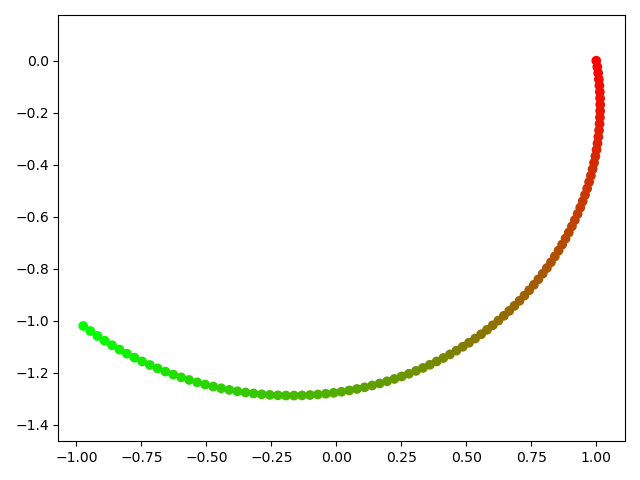

In [30]:
plt.figure()
plt.scatter(points2[:,0], points2[:,1], c=get_colors(points2))
plt.axis('equal')
plt.tight_layout()

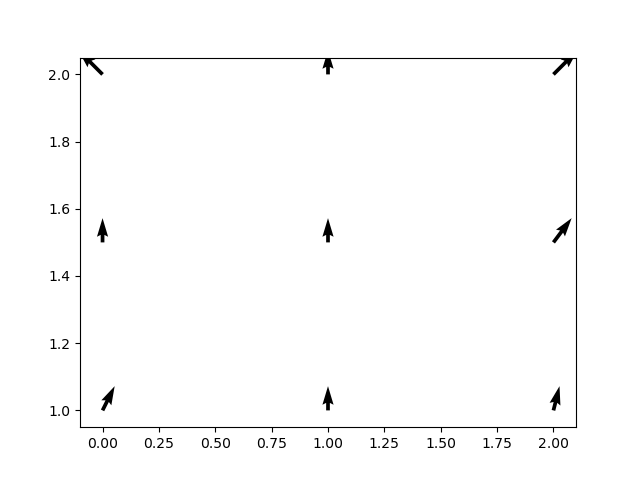

In [31]:
import matplotlib.pyplot as plt, numpy as np
x = [0, 0, 1, 1, 2, 2, 0, 1, 2]
y = [1, 2, 1, 2, 1, 2, 1.5, 1.5, 1.5]
u = [0.5, -1, 0, 0, 0.25, 1, 0, 0, 0.75]
v = [1, 1, 1, 1, 1, 1, 1, 1, 1]
plt.figure()
plt.quiver(x, y, u, v)
plt.show()

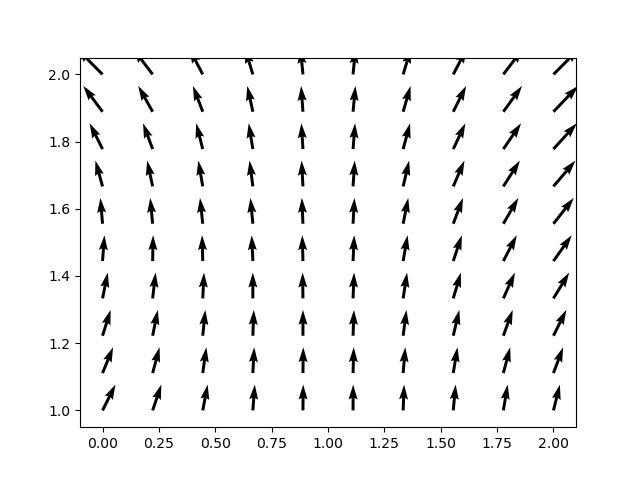

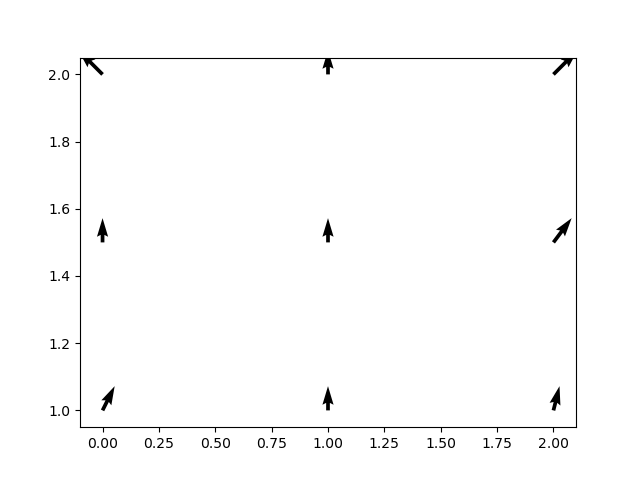

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

x = [0, 0, 1, 1, 2, 2, 0, 1, 2]
y = [1, 2, 1, 2, 1, 2, 1.5, 1.5, 1.5]
u = [0.5, -1, 0, 0, 0.25, 1, 0, 0, 0.75]
v = [1, 1, 1, 1, 1, 1, 1, 1, 1]

plt.figure()
plt.quiver(x, y, u, v)

xx = np.linspace(0, 2, 10)
yy = np.linspace(1, 2, 10)
xx, yy = np.meshgrid(xx, yy)

points = np.transpose(np.vstack((x, y)))
u_interp = interpolate.griddata(points, u, (xx, yy), method='cubic')
v_interp = interpolate.griddata(points, v, (xx, yy), method='cubic')

plt.figure()
plt.quiver(xx, yy, u_interp, v_interp) # format 
plt.show()

In [33]:
from scipy.spatial.transform import Rotation as R

from scipy.spatial.transform import Slerp

In [34]:
key_rots = R.random(5, random_state=2342345)

key_times = [0, 1, 2, 3, 4]

In [35]:
slerp = Slerp(key_times, key_rots)

In [36]:
times = [0, 0.5, 0.25, 1, 1.5, 2, 2.75, 3, 3.25, 3.60, 4]

interp_rots = slerp(times)

In [37]:
key_rots.as_euler('xyz', degrees=True)

array([[ 14.31443779, -27.50095894,  -3.7275787 ],
       [ -1.79924227, -24.69421529, 164.57701743],
       [146.15020772,  43.22849451, -31.34891088],
       [ 46.39959442,  11.62126073, -45.99719267],
       [-88.94647804, -49.64400082, -65.80546984]])

In [38]:
# this creates the interpolated points
interp_rots.as_euler('xyz', degrees=True)

array([[  14.31443779,  -27.50095894,   -3.7275787 ],
       [   4.74588574,  -32.44683966,   81.25139984],
       [  10.71094749,  -31.56690154,   38.06896408],
       [  -1.79924227,  -24.69421529,  164.57701743],
       [  11.72796022,   51.64207311, -171.7374683 ],
       [ 146.15020772,   43.22849451,  -31.34891088],
       [  68.10921869,   20.67625074,  -48.74886034],
       [  46.39959442,   11.62126073,  -45.99719267],
       [  12.35552615,    4.21525086,  -64.89288124],
       [ -30.08117143,  -19.90769513,  -78.98121326],
       [ -88.94647804,  -49.64400082,  -65.80546984]])